In [826]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay,accuracy_score,classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [827]:
df=pd.read_csv("train.csv") #data source https://www.kaggle.com/c/titanic/data

In [828]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [829]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [830]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [831]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

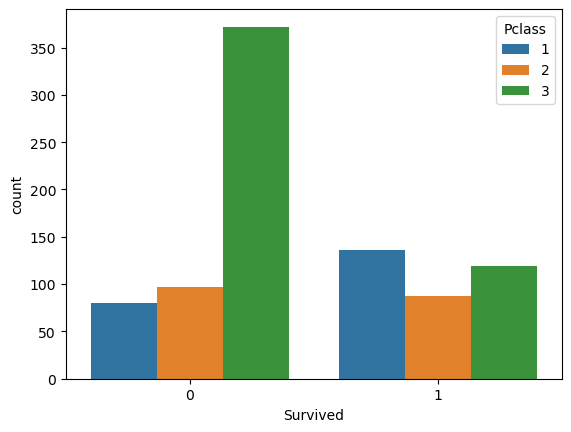

In [832]:
sns.countplot(data=df,x="Survived",hue="Pclass")

In [833]:
#Thereis no big embalanced between two label categories
#The numbers of suvived people with different ticket class are similar

<AxesSubplot:xlabel='Fare', ylabel='Age'>

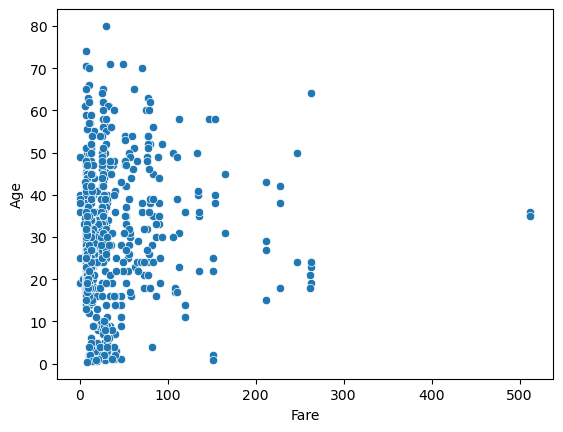

In [834]:
sns.scatterplot(data=df,x="Fare",y="Age")

In [835]:
#there is no correlation between fare and age of passangers

In [836]:
177/891*100

19.865319865319865

In [837]:
#We have 20% of data missing age values

In [838]:
687/891*100

77.10437710437711

In [839]:
# 77% of data misses cabin name, we might consider dropping this column

In [840]:
#We have only two missing values for "Embarked" and will drop corresponding rows

In [841]:
df.dropna(subset=["Embarked"],axis=0,inplace=True)

In [842]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          712 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Cabin        202 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 90.3+ KB


In [843]:
#df.drop("Cabin",axis=1,inplace=True)

In [844]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          712 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Cabin        202 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 90.3+ KB


In [845]:
df["Cabin"].nunique()

146

In [846]:
df["Cabin_letter"]=df["Cabin"].apply(lambda x:str(x)[0])

In [847]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_letter
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,n
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,n
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,n


In [848]:
df["Cabin_letter"].nunique()

9

In [849]:
df["Cabin_letter"].unique()

array(['n', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

(0.0, 300.0)

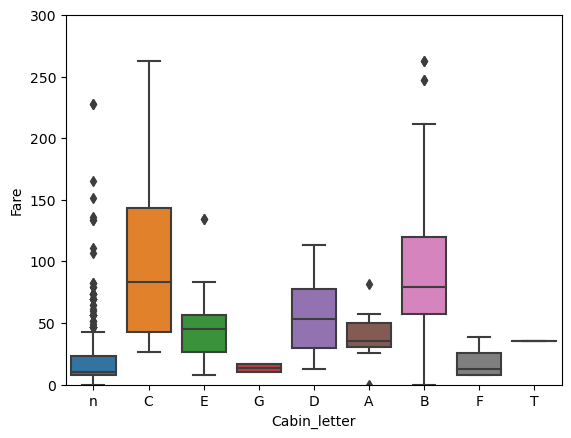

In [850]:
sns.boxplot(data=df,x="Cabin_letter",y="Fare")
plt.ylim(0,300)

In [851]:
#It seems that data with missing cabin  numbers corresponds to low a Fare values, similar to cabin numbers starting with "G" and "F"

In [852]:
#For now we will just drop cabin column 

In [853]:
df.drop(["Cabin","Cabin_letter"],axis=1,inplace=True)

In [854]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          712 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 115.6+ KB


In [855]:
df["Ticket"].nunique()

680

In [856]:
df["Embarked"].nunique()

3

In [857]:
df["PassengerId"].nunique()

889

In [858]:
df_group=df.groupby("Ticket")["PassengerId"].count()

In [859]:
df_group

Ticket
110152         3
110413         3
110465         2
110564         1
110813         1
              ..
W./C. 6608     4
W./C. 6609     1
W.E.P. 5734    1
W/C 14208      1
WE/P 5735      2
Name: PassengerId, Length: 680, dtype: int64

In [860]:
#PassangerID is unique identifier, but there ae few passingers with the same Ticket
#We will create a new column that shows toal number of passangers with given ticket number called "Passenger Count"

In [861]:
df_group=df_group.reset_index()

In [862]:
df_group.columns

Index(['Ticket', 'PassengerId'], dtype='object')

In [863]:
df_group.columns=['Ticket', 'Passenger Count']

In [864]:
df_group

,Ticket,Passenger Count
0,110152,3
1,110413,3
2,110465,2
3,110564,1
4,110813,1
...,...,...
675,W./C. 6608,4
676,W./C. 6609,1
677,W.E.P. 5734,1
678,W/C 14208,1


In [865]:
df=df.merge(df_group,left_on="Ticket",right_on="Ticket")

In [866]:
df[df["Ticket"]=="110152"]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Passenger Count
352,258,1,1,"Cherry, Miss. Gladys",female,30.0,0,0,110152,86.5,S,3
353,505,1,1,"Maioni, Miss. Roberta",female,16.0,0,0,110152,86.5,S,3
354,760,1,1,"Rothes, the Countess. of (Lucy Noel Martha Dye...",female,33.0,0,0,110152,86.5,S,3


In [867]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 888
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PassengerId      889 non-null    int64  
 1   Survived         889 non-null    int64  
 2   Pclass           889 non-null    int64  
 3   Name             889 non-null    object 
 4   Sex              889 non-null    object 
 5   Age              712 non-null    float64
 6   SibSp            889 non-null    int64  
 7   Parch            889 non-null    int64  
 8   Ticket           889 non-null    object 
 9   Fare             889 non-null    float64
 10  Embarked         889 non-null    object 
 11  Passenger Count  889 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 90.3+ KB


In [868]:
#We will now remove "Ticket column"

In [869]:
df.drop("Ticket",axis=1,inplace=True)

In [870]:
df["Name"].nunique() # we can drop this column as it is not very informative

889

In [871]:
df.drop("Name",axis=1,inplace=True)

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

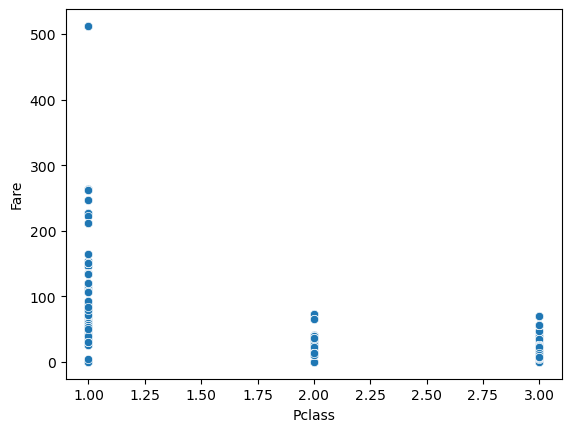

In [872]:
sns.scatterplot(data=df,y="Fare",x="Pclass")

In [873]:
#We can see that fares above 100 correspond to first class

In [874]:
df.select_dtypes("object").columns

Index(['Sex', 'Embarked'], dtype='object')

In [875]:
df=pd.get_dummies(df,columns=['Sex', 'Embarked'],drop_first=True)

In [876]:
df_corr=df.corr()["Survived"].sort_values()

In [877]:
df_corr

Sex_male          -0.541585
Pclass            -0.335549
Embarked_S        -0.151777
Age               -0.082446
SibSp             -0.034040
PassengerId       -0.005028
Embarked_Q         0.004536
Passenger Count    0.037872
Parch              0.083151
Fare               0.255290
Survived           1.000000
Name: Survived, dtype: float64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Sex_male'),
  Text(1, 0, 'Pclass'),
  Text(2, 0, 'Embarked_S'),
  Text(3, 0, 'Age'),
  Text(4, 0, 'SibSp'),
  Text(5, 0, 'PassengerId'),
  Text(6, 0, 'Embarked_Q'),
  Text(7, 0, 'Passenger Count'),
  Text(8, 0, 'Parch'),
  Text(9, 0, 'Fare'),
  Text(10, 0, 'Survived')])

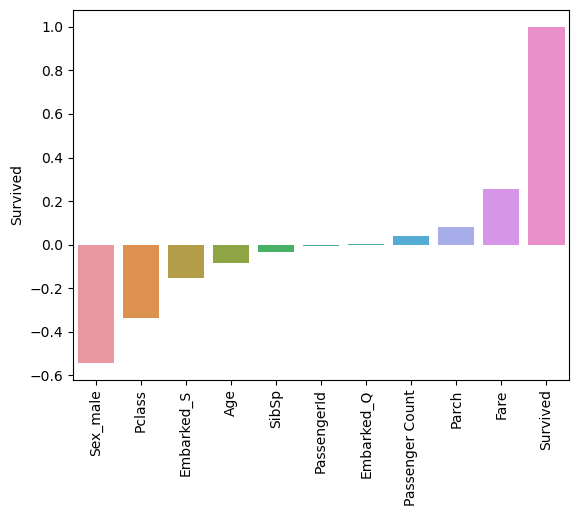

In [878]:
sns.barplot(x=df_corr.index,y=df_corr)
plt.xticks(rotation=90)

In [879]:
# We can see he highest correlation of survival with gender

<AxesSubplot:xlabel='Age', ylabel='Count'>

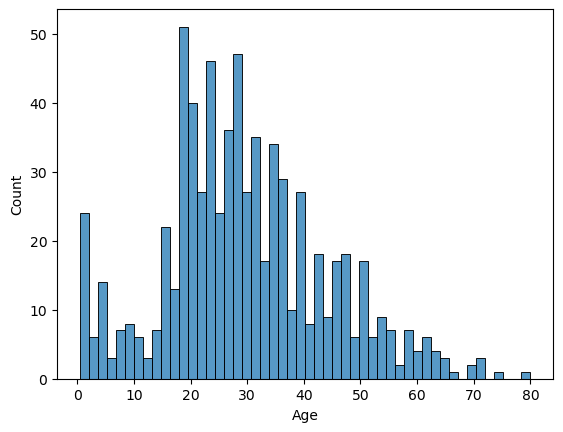

In [880]:
sns.histplot(data=df,x="Age",bins=50)

In [881]:
#Lets fill the empty age values with average age

In [882]:
avg_age=df["Age"].mean()

In [883]:
avg_age

29.64209269662921

In [884]:
df["Age"]=df["Age"].fillna(29.64)

In [885]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 888
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PassengerId      889 non-null    int64  
 1   Survived         889 non-null    int64  
 2   Pclass           889 non-null    int64  
 3   Age              889 non-null    float64
 4   SibSp            889 non-null    int64  
 5   Parch            889 non-null    int64  
 6   Fare             889 non-null    float64
 7   Passenger Count  889 non-null    int64  
 8   Sex_male         889 non-null    uint8  
 9   Embarked_Q       889 non-null    uint8  
 10  Embarked_S       889 non-null    uint8  
dtypes: float64(2), int64(6), uint8(3)
memory usage: 97.4 KB


In [886]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Passenger Count,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,1,1,0,1
1,2,1,1,38.0,1,0,71.2833,1,0,0,0
2,3,1,3,26.0,0,0,7.9250,1,0,0,1
3,4,1,1,35.0,1,0,53.1000,2,0,0,1
4,138,0,1,37.0,1,0,53.1000,2,1,0,1


# Model

In [887]:
X=df.drop("Survived",axis=1)
y=df["Survived"]

In [888]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [889]:
def Run_model(model,param_grid,X_train,y_train,X_test,y_test):
    
    grid=GridSearchCV(model,param_grid)
    grid.fit(X_train,y_train)
    print(f"Best parameters are: {grid.best_params_}")
    print(f"Feature importances are: {grid.best_estimator_.feature_importances_}")
    
    y_pred=grid.predict(X_test)
    error=1-accuracy_score(y_test,y_pred)
    print(f"Error is {error}")
    print(classification_report(y_test,y_pred))
    ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

## Gradient Boost Classifier

In [891]:
model=GradientBoostingClassifier()
param_grid={"n_estimators":[20,50,100],"learning_rate":[0.05,0.1,0.5],"max_depth":[3,5]}

Best parameters are: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 20}
Feature importances are: [0.03479225 0.16304601 0.07799548 0.03037755 0.         0.07313117
 0.06733674 0.54610912 0.         0.0072117 ]
Error is 0.15986394557823125
              precision    recall  f1-score   support

           0       0.85      0.91      0.88       192
           1       0.81      0.71      0.75       102

    accuracy                           0.84       294
   macro avg       0.83      0.81      0.82       294
weighted avg       0.84      0.84      0.84       294



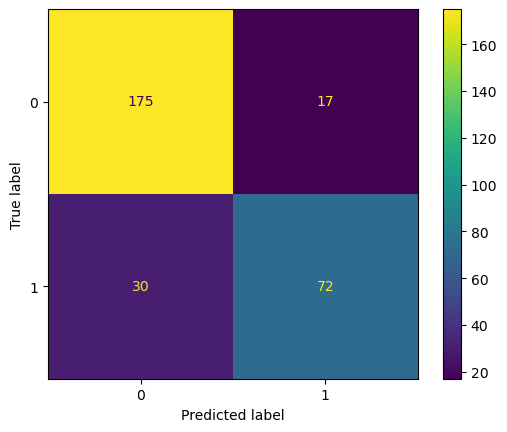

In [892]:
Run_model(model,param_grid,X_train,y_train,X_test,y_test)

## Random Forest model

In [896]:
model=RandomForestClassifier()
param_grid={"n_estimators":[10,50,100],"max_features":["sqrt","log2",None],"max_depth":[16,50,100]}

Best parameters are: {'max_depth': 16, 'max_features': 'log2', 'n_estimators': 100}
Feature importances are: [0.1893285  0.07338682 0.15823467 0.03737788 0.03295818 0.17493432
 0.06242106 0.2360644  0.01251323 0.02278095]
Error is 0.16666666666666663
              precision    recall  f1-score   support

           0       0.85      0.90      0.88       192
           1       0.79      0.71      0.75       102

    accuracy                           0.83       294
   macro avg       0.82      0.80      0.81       294
weighted avg       0.83      0.83      0.83       294



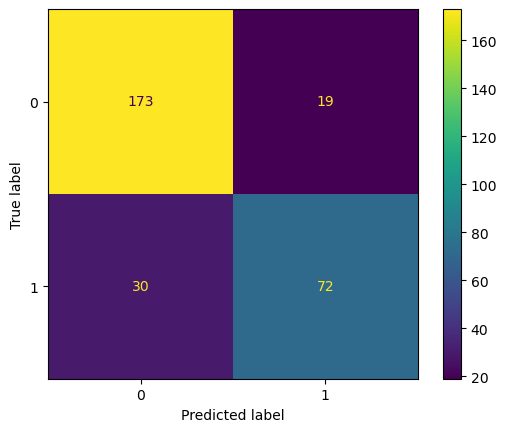

In [897]:
Run_model(model,param_grid,X_train,y_train,X_test,y_test)

### Gradient Boost Classifier performs slightely better
### Now that we know best model parameters we create final model wih these parameters and fit to entire data

In [777]:
final_model=GradientBoostingClassifier(learning_rate=0.1, max_depth=3, n_estimators=20)

In [778]:
final_model.fit(X,y)

GradientBoostingClassifier(n_estimators=20)

In [779]:
from joblib import dump, load
dump(final_model,"Titanik_model.joblib")

['Titanik_model.joblib']

In [780]:
loaded_model=load("Titanik_model.joblib")

# Read data for prediction

In [781]:
df_predict=pd.read_csv("test.csv")

In [782]:
df_predict

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [783]:
df_predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [784]:
df_predict.drop(["Cabin"],axis=1,inplace=True)

In [785]:
df_gr=df_predict.groupby("Ticket")["PassengerId"].count()
df_gr=df_gr.reset_index()
df_gr.columns=['Ticket', 'Passenger Count']
df_predict=df_predict.merge(df_gr,left_on="Ticket",right_on="Ticket")

In [786]:
df_predict.drop(["Ticket","Name"],axis=1,inplace=True)

In [787]:
df_predict=pd.get_dummies(df_predict,columns=['Sex', 'Embarked'],drop_first=True)

In [788]:
df_predict.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PassengerId      418 non-null    int64  
 1   Pclass           418 non-null    int64  
 2   Age              332 non-null    float64
 3   SibSp            418 non-null    int64  
 4   Parch            418 non-null    int64  
 5   Fare             417 non-null    float64
 6   Passenger Count  418 non-null    int64  
 7   Sex_male         418 non-null    uint8  
 8   Embarked_Q       418 non-null    uint8  
 9   Embarked_S       418 non-null    uint8  
dtypes: float64(2), int64(5), uint8(3)
memory usage: 27.3 KB


In [789]:
age_mean=df_predict["Age"].mean()
df_predict["Age"]=df_predict["Age"].fillna(age_mean)

In [790]:
age_mean

30.272590361445783

In [791]:
df_predict.loc[df_predict.isnull().any(axis=1)]

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Passenger Count,Sex_male,Embarked_Q,Embarked_S
172,1044,3,60.5,0,0,NaN,1,1,0,1


In [792]:
#Since this is a third cass ticket , we'll assign the fare based on the average fare value for 3rd class

In [793]:
third_class_mean_fare=df_predict[df["Pclass"]==3]["Fare"].mean()

C:\Users\17573\anaconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [794]:
df_predict["Fare"].fillna(third_class_mean_fare,inplace=True)

In [795]:
df_predict.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PassengerId      418 non-null    int64  
 1   Pclass           418 non-null    int64  
 2   Age              418 non-null    float64
 3   SibSp            418 non-null    int64  
 4   Parch            418 non-null    int64  
 5   Fare             418 non-null    float64
 6   Passenger Count  418 non-null    int64  
 7   Sex_male         418 non-null    uint8  
 8   Embarked_Q       418 non-null    uint8  
 9   Embarked_S       418 non-null    uint8  
dtypes: float64(2), int64(5), uint8(3)
memory usage: 27.3 KB


In [796]:
final_pred=final_model.predict(df_predict)

In [797]:
final_pred

array([0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,

In [798]:
df_sub=pd.DataFrame(data=df_predict["PassengerId"])

In [799]:
df_sub["Survived"]=final_pred

In [800]:
df_sub.head(7)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,0
5,897,0
6,898,1


In [801]:
df_sub.to_csv('Sub_predictions.csv', index=False) 